## pandas

In [ ]:
import pandas as pd

### Series 생성 및 속성

In [ ]:
data = [10,30,30]
sr = pd.Series(data)
sr

,0
0,10
1,30
2,30


In [ ]:
# 둘 다 튜플
x, y = (10, 20)
x, y = 10, 20

In [ ]:
sr.index, sr.values

(RangeIndex(start=0, stop=3, step=1), array([10, 30, 30]))

In [ ]:
sr.name = 'Score'
sr

,Score
0,10
1,30
2,30


In [ ]:
sr.shape

(3,)

In [ ]:
data = [10,30,30]
sr = pd.Series(data, index=['a','b','c'])
sr

,0
a,10
b,30
c,30


In [ ]:
data = {'a':10, 'b':20, 'c':20}
pd.Series(data)

,0
a,10
b,20
c,20


## DataFrame 생성과 속성

In [ ]:
data = {
    'Name':['Alice', 'Bob', 'Charlie', 'John'],
    'Age':[25, 30, None, 27],
    'Gender':[1,0,1,1]
}

df = pd.DataFrame(data)
df

,Name,Age,Gender
0,Alice,25.0,1
1,Bob,30.0,0
2,Charlie,NaN,1
3,John,27.0,1


In [ ]:
df.shape

(4, 3)

In [ ]:
df.head()

,Name,Age,Gender
0,Alice,25,1
1,Bob,30,0
2,Charlie,28,1
3,John,27,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   Gender  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


## 필터링 및 슬라이싱

In [ ]:
df

,Name,Age,Gender
0,Alice,25.0,1
1,Bob,30.0,0
2,Charlie,NaN,1
3,John,27.0,1


In [ ]:
df['Name']

,Name
0,Alice
1,Bob
2,Charlie
3,John


In [ ]:
type(df['Name'])

pandas.core.series.Series

In [ ]:
df[['Name','Age']]

,Name,Age
0,Alice,25.0
1,Bob,30.0
2,Charlie,NaN
3,John,27.0


In [ ]:
type(df[['Name','Age']])

pandas.core.frame.DataFrame

In [ ]:
df

,Name,Age,Gender
0,Alice,25.0,1
1,Bob,30.0,0
2,Charlie,NaN,1
3,John,27.0,1


In [ ]:
df[df['Age']>=26]

,Name,Age,Gender
1,Bob,30.0,0
3,John,27.0,1


In [ ]:
df[df['Age'].isna()]
df[(df['Age'].notna()) & (df['Gender'] == 0)]

,Name,Age,Gender
1,Bob,30.0,0


- iloc
- loc

In [ ]:
df.iloc[0,0]

'Alice'

In [ ]:
df.loc[0:2, ["Name", "Gender"]]
df.loc[df['Age']>=26, ["Name", "Gender"]]

,Name,Gender
1,Bob,0
3,John,1


In [ ]:
df['Age*2'] = df['Age']*2
df

,Name,Age,Gender,Age*2
0,Alice,25.0,1,50.0
1,Bob,30.0,0,60.0
2,Charlie,NaN,1,NaN
3,John,27.0,1,54.0


In [ ]:
df.drop(['Age'], axis=1, inplace=True)
df

,Name,Gender,Age*2
0,Alice,1,50.0
1,Bob,0,60.0
2,Charlie,1,NaN
3,John,1,54.0


In [ ]:
df.fillna(0)

,Name,Gender,Age*2
0,Alice,1,50.0
1,Bob,0,60.0
2,Charlie,1,0.0
3,John,1,54.0


In [ ]:
df

,Name,Gender,Age*2
0,Alice,1,50.0
1,Bob,0,60.0
2,Charlie,1,NaN
3,John,1,54.0


In [ ]:
df['Age']=df['Age*2'].fillna(0)
df

,Name,Gender,Age*2,Age
0,Alice,1,50.0,50.0
1,Bob,0,60.0,60.0
2,Charlie,1,NaN,0.0
3,John,1,54.0,54.0


## 데이터 집계 및 그룹화

In [ ]:
data = {
    'Name':['Alice', 'Bob', 'Charlie', 'John'],
    'Age':[25, 30, 28, 27],
    'Gender':[1,0,1,0],
    'Area':['B','A','A','B']
}

df = pd.DataFrame(data)
df

,Name,Age,Gender,Area
0,Alice,25,1,B
1,Bob,30,0,A
2,Charlie,28,1,A
3,John,27,0,B


In [ ]:
df.groupby('Gender')['Age'].sum()

,Age
Gender,
0,57
1,53


In [ ]:
df.groupby(['Gender','Area'])['Age'].mean()

Gender  Area
0       A       30.0
        B       27.0
1       A       28.0
        B       25.0
Name: Age, dtype: float64

In [ ]:
df['Gender'].value_counts()

,count
Gender,
1,2
0,2


<Axes: >

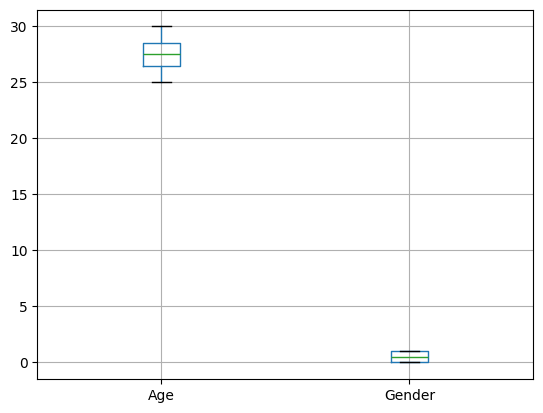

In [ ]:
# 판다스로도 간단한 시각화 가능해욤.,,!
# df.plot()
df.boxplot()